# <center>Part I-A:</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting Data
df = pd.read_csv("./ab40c054-5031-4376-b52e-9813e776f65e.csv")

In [3]:
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


### Percentage Missing Values in all the columns:

In [4]:
round(100 * df.isnull().sum()/df.shape[0],2)

Items  Description             0.00
Duration                       0.00
Andhra Pradesh                 0.00
Arunachal Pradesh             18.18
Assam                         18.18
Bihar                         18.18
Chhattisgarh                   0.00
Goa                           18.18
Gujarat                       18.18
Haryana                        0.00
Himachal Pradesh              36.36
Jammu & Kashmir               18.18
Jharkhand                     18.18
Karnataka                     18.18
Kerala                        18.18
Madhya Pradesh                 0.00
Maharashtra                   36.36
Manipur                       36.36
Meghalaya                      0.00
Mizoram                       36.36
Nagaland                      36.36
Odisha                         0.00
Punjab                        36.36
Rajasthan                     36.36
Sikkim                        18.18
Tamil Nadu                     0.00
Telangana                      0.00
Tripura                     

#### "West Bengal1" has all the missing values (100 %). We'll remove this column.

### Percentage Missing Values in all the Rows:

In [5]:
round(100 * df.isnull().sum(axis=1)/df.shape[1],2)

0      2.78
1      2.78
2      2.78
3      2.78
4     27.78
5     63.89
6      2.78
7      2.78
8      2.78
9     27.78
10    63.89
dtype: float64

#### Row at index 5 and 10 have around 64% missing values, so we'll remove them.

## Data Cleaning:

#### Removing rows on index 5 and 10 as they have 63.89% missing values. These row represent 2016-17 Data. Also, we'll remove
#### "West Bengal1" column along with Union Terriotries 'Puducherry', 'Delhi', 'Chandigarh', 'Andaman & Nicobar Islands'

In [6]:
state_df = df.drop(columns= ['West Bengal1', 'Andaman & Nicobar Islands', 'Chandigarh', 'Delhi', 'Puducherry'])

In [7]:
# Removing rows at index 0 and 5:
state_df = state_df.drop(index=[5,10])

In [8]:
state_df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,227872.00,266628.00,436465.00,11165.00,751485.00,359433.00,19208.00,724049.00,115523.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,258275.00,297734.00,494004.00,12338.00,855481.00,401493.00,21663.00,822903.00,131835.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,291709.00,334714.00,549701.00,13862.00,971090.00,452186.00,25593.00,944146.00,149817.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,321971.00,368011.00,612194.00,15209.00,1092564.00,511178.00,29667.00,1043371.00,161985.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,341887.00,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


#### As we want to plot "% Growth over previous year" to solve 1st part, selecting those rows only. Removing "GSDP - CURRENT PRICES (` in Crore)" rows

In [9]:
growth_df = state_df[5:]

#### Removing 'Items Description' and 'Duration' columns to get only Growth Data of each state:

In [10]:
growth_df = growth_df.iloc[:,2:]

In [11]:
growth_df

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
6,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
7,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
8,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
9,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


#### Renaming index as 1,2,3,4:

In [12]:
growth_df = growth_df.rename(index={6:1, 7:2, 8:3, 9:4})

In [13]:
growth_df

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
1,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,13.86
2,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,12.97
3,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.65
4,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


## <center>1st Part of I-A</center>

### Best Fit Line for "% Growth over previous year":

F:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


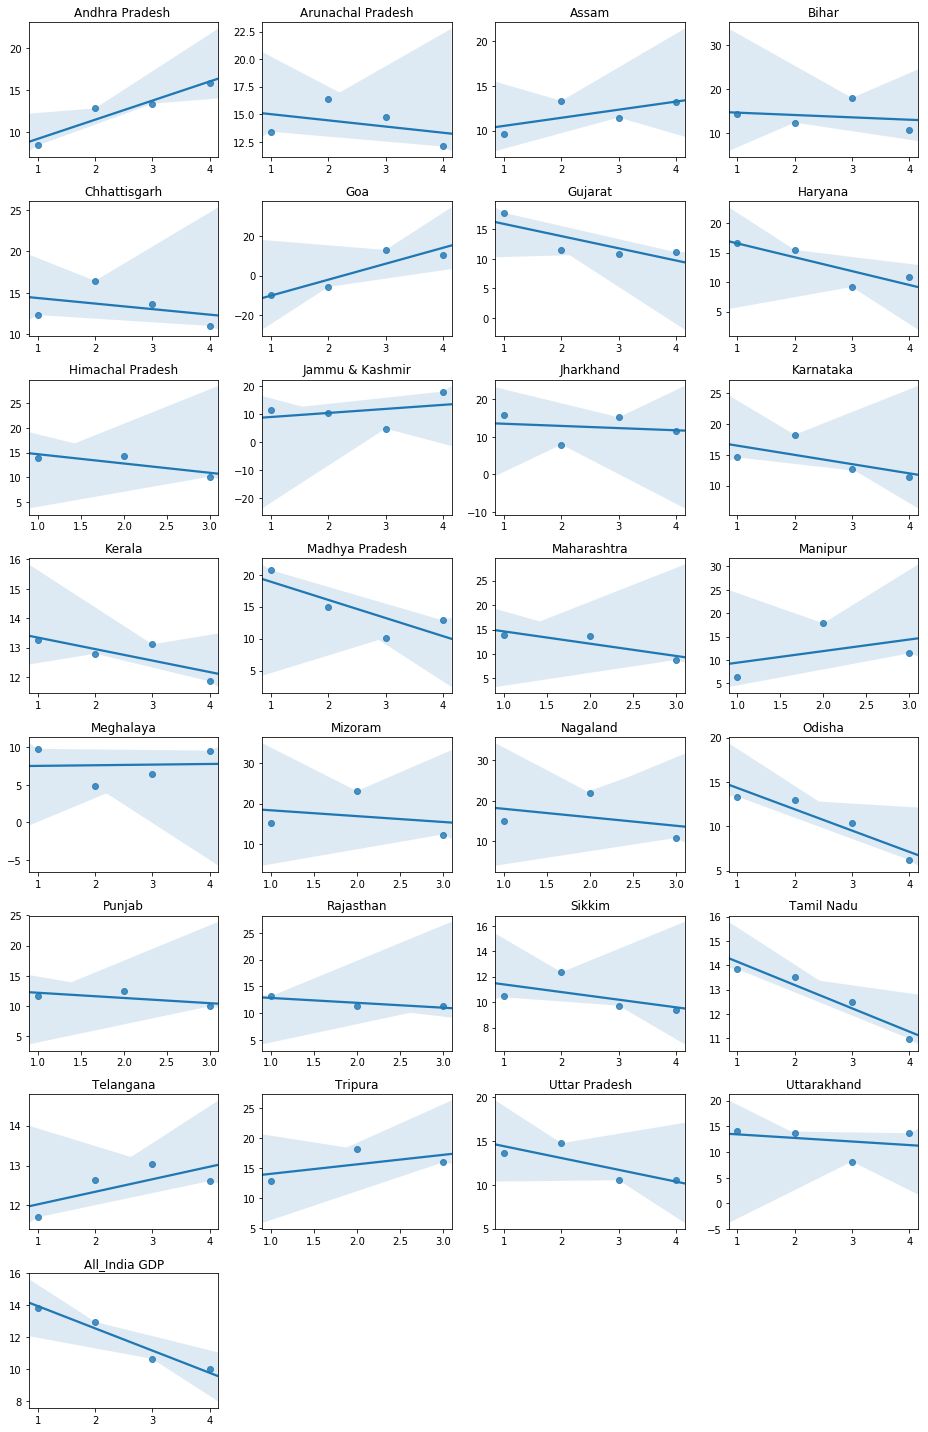

In [14]:
plt.figure(figsize=(13,20))
for i in range(0, growth_df.shape[1]):
    plt.subplot(8,4,i+1)
    #plt.scatter(x=growth_df.index, y= growth_df.iloc[:,i], data=growth_df)
    sns.regplot(x=list(growth_df.index), y=growth_df.iloc[:,i], data=growth_df)
    plt.title(growth_df.columns[i])
    plt.ylabel("")
    plt.tight_layout()

#### Q. How will you compare the growth rates of any two states?
We can compare Growth rate of any two states by looking at the slope of the best fit line of respective states. if the slope of one state is higher than other, its growth rate is higher.

#### Q. Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.
Andhra Pradesh, Goa and Telangana are fastest growing states and Tamil Nadu, Odisha and Madhya Pradesh are slowest.

#### Q. What is the Nation's growth rate?
As per the plot, we can see that there is a negative slop which indicates a declining National growth rate over the years.

#### Q. What has been the growth rate of your home state, and how does it compare to the national growth rate?
Uttar Pradesh is my home state. Overall its growth rate is negative. However, but as compared to National growth rate, it’s better.


## <center>2nd Part of I-A</center>

#### As we want to plot "GSDP - CURRENT PRICES" for the year "2015-16" to solve 2nd part, selecting this row only. Removing rest of the rows:

In [15]:
gsdp_df = state_df.loc[df.Duration=='2015-16', :]

In [16]:
gsdp_df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,341887.00,NaN,NaN,16637.00,1212668.00,575631.00,NaN,1153795.00,184091.00,13675331.00
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,9.99


In [17]:
gsdp_df = gsdp_df.drop(index=9)

In [18]:
gsdp_df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,All_India GDP
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,13675331.0


#### Removing the column "All_India GDP" because we have to plot values for States only:

In [19]:
gsdp_df = gsdp_df.drop(columns=['All_India GDP'])

#### Removing 'Items Description' and 'Duration' columns to get only State and GSDP Data:

In [20]:
gsdp_df = gsdp_df.iloc[:,2:]

#### Renaming the index 4 as "GSDP":

In [21]:
gsdp_df = gsdp_df.rename(index={4:'GSDP'})

In [22]:
gsdp_df

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand
GSDP,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,...,NaN,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0


#### Transposing the dataframe for better look:

In [23]:
gsdp_df = gsdp_df.T

In [24]:
gsdp_df.head()

,GSDP
Andhra Pradesh,609934.0
Arunachal Pradesh,18784.0
Assam,224234.0
Bihar,413503.0
Chhattisgarh,260776.0


### Sorting the "GSDP" column:

In [25]:
gsdp_df = gsdp_df.sort_values(by='GSDP', ascending=False)

### Plotting "State" vs "GSDP":

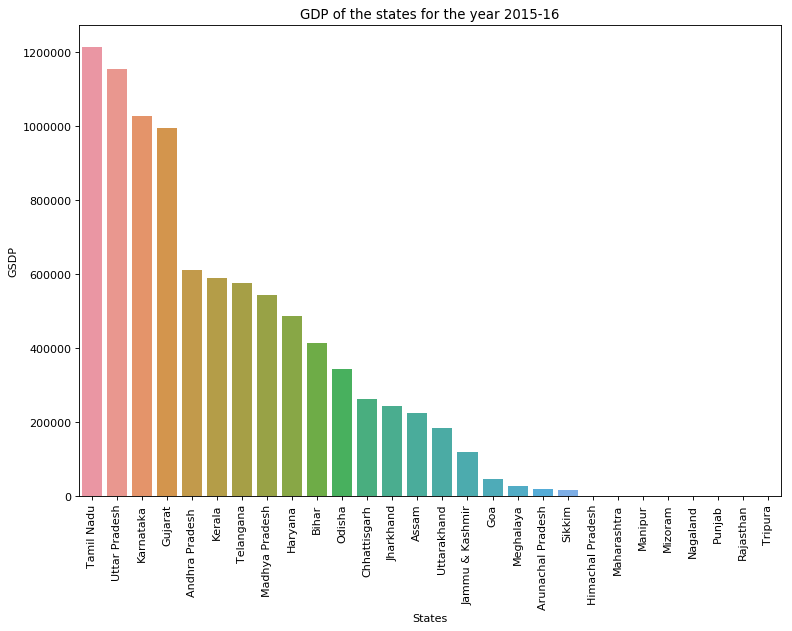

In [109]:
fig = plt.figure(figsize=(10, 8), dpi = 80)
sns.barplot(x= gsdp_df.index, y='GSDP', data=gsdp_df)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.title("GDP of the states for the year 2015-16")
plt.tight_layout()
plt.show()

#### Q. Which Plot will you use for this? Why? (Remember to plot the graph in a way such as it is easier to read and compare).
For this I have used Bar Plot because we have 2 variables; one is categorical and other is numerical. So, to plot this, bar plot is right and simple choice for good visualization.

#### Q. Identify the top 5 and the bottom 5 states based on total GDP.
Top 5 States: Tamil Nadu, Uttar Pradesh, Karnataka, Gujarat, Andhra Pradesh
Bottom 5 States: Sikkim, Arunachal Pradesh, Meghalaya, Goa, Jammu & Kashmir

#### Q. What insights can you draw from this graph? What states are performing poorly?
GDP depends on the population, so leaving the states which have missing values; states with less population tend to have smaller GDP and ones with more population tend to have larger GDP. Sikkim, Arunachal Pradesh, Medhalaya etc. are poorly growing states.


# <cemter>--------------------------------------------------------------------------------------------------------</center>

# <center>Part I-B:</center>

In [172]:
import glob, os
path = "D:/Agam's World/Office Documents/Data Science/UpGrad/GDP Assignment/GDP_Dataset/GDP_2"
#Reading all files in path
all_files= glob.glob(path + "/*.csv")

emp_list = []
for file in all_files:
    df=pd.read_csv(file,index_col=None,header=0, encoding="cp1252")
    df=df[['Item','2014-15']]
    df=df.T
    new_header=df.iloc[0]
    df.columns=new_header
    df=df[1:]
    
    df.insert(loc=0, column='State_Name', value=file.split("\\")[-1].split("-")[1])    # Creating column at index 0
    emp_list.append(df)
    
all_states = pd.concat(emp_list,axis=0,ignore_index=True, sort=False)

In [174]:
all_states

,State_Name,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",...,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
0,Andhra_Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,...,48825542,5512100,1690800,52646842,501510,104977,NaN,NaN,NaN,NaN
1,Arunachal_Pradesh,686117,415520,38387,224017,8193,30842,716959,26120,113527,...,1636292,70099,30272,1676119,14870,112718,NaN,NaN,NaN,NaN
2,Assam,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,...,18666897,1725309,582406,19809800,326780,60621,NaN,NaN,NaN,NaN
3,Bihar,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,...,36184863,3213546,2006421,37391988,1101240,33954,NaN,NaN,NaN,NaN
4,Chandigarh,16233,1659,13992,388,194,179,16412,149631,29741,...,2755113,52622,23309,2784426,11120,250398,NaN,NaN,NaN,NaN
5,Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,...,22228481,2601791,1332092,23498180,270530,86860,NaN,NaN,NaN,NaN
6,Delhi,250568,64959,183770,861,978,963777,1214345,2749307,971255,...,43023249,6611719,392546,49242422,179690,274041,NaN,NaN,NaN,NaN
7,Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,...,3597882,527279,61854,4063307,14950,271793,NaN,NaN,NaN,NaN
8,Gujarat,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,...,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,2.74416e+06,NaN,NaN,NaN
9,Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,...,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,NaN,NaN,NaN,NaN


#### Filtering Union Terretories out: Chandigarh, Delhi, Puducherry

In [175]:
all_states = all_states[(all_states['State_Name'] != 'Chandigarh') & (all_states['State_Name'] != 'Delhi') & (all_states['State_Name'] != "Puducherry")]

In [177]:
all_states

,State_Name,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",...,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Services incidental to transport*,Trade & repair services*,Road transport**,Road transport*
0,Andhra_Pradesh,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,...,48825542,5512100,1690800,52646842,501510,104977,NaN,NaN,NaN,NaN
1,Arunachal_Pradesh,686117,415520,38387,224017,8193,30842,716959,26120,113527,...,1636292,70099,30272,1676119,14870,112718,NaN,NaN,NaN,NaN
2,Assam,3855548,2890544,173478,261987,529539,1471149,5326697,2002936,296587,...,18666897,1725309,582406,19809800,326780,60621,NaN,NaN,NaN,NaN
3,Bihar,7951890,4688237,2060296,550132,653224,68107,8019997,2189965,345168,...,36184863,3213546,2006421,37391988,1101240,33954,NaN,NaN,NaN,NaN
5,Chhattisgarh,3948847,2613371,352208,597785,385483,2451970,6400817,4370593,1198438,...,22228481,2601791,1332092,23498180,270530,86860,NaN,NaN,NaN,NaN
7,Goa,308507,140421,30141,15744,122201,3622,312129,1177608,204110,...,3597882,527279,61854,4063307,14950,271793,NaN,NaN,NaN,NaN
8,Gujarat,1.377e+07,9.67109e+06,2.69891e+06,761616,638357,2.11722e+06,1.58872e+07,2.40875e+07,3.40998e+06,...,7.91311e+07,1.23532e+07,1.98155e+06,8.95027e+07,633590,141263,2.74416e+06,NaN,NaN,NaN
9,Haryana,8.01524e+06,4.63673e+06,2.91617e+06,352254,110080,25186,8.04042e+06,7.75692e+06,1.10192e+06,...,3.98284e+07,4.98567e+06,1.06787e+06,4.37462e+07,266620,164077,NaN,NaN,NaN,NaN
10,Himachal_Pradesh,1514981,853758,110304,540950,9968,33385,1548366,2543637,767268,...,9800853,895317,259291,10436879,70840,147330,NaN,NaN,NaN,NaN
11,Jharkhand,3211065,2094466,562503,445149,108947,2037289,5248354,4114148,337489,...,19623166,2499171,411619,21710718,349660,62091,NaN,NaN,NaN,NaN


#### Sorting values of the column "Per Capita GSDP (Rs.)" in decreasing order:

In [181]:
all_states = all_states.sort_values(by='Per Capita GSDP (Rs.)', ascending=False)

### Plotting the GDP per capita for all the states:

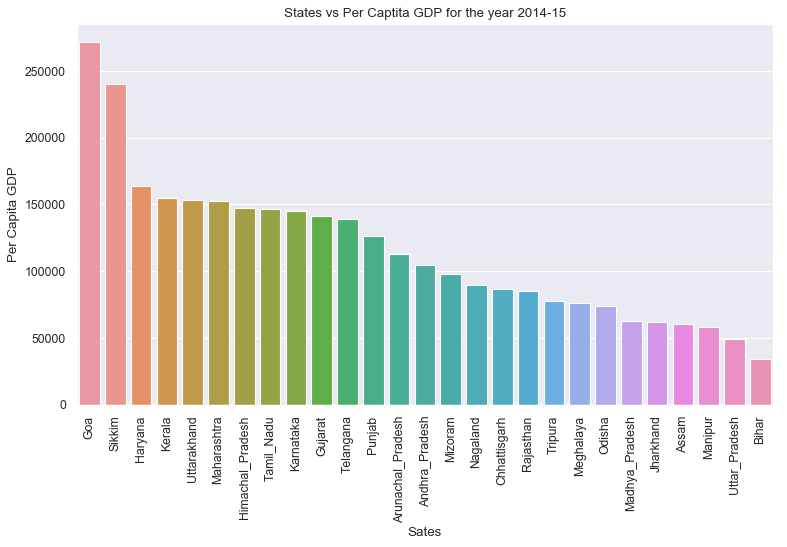

In [778]:
plt.figure(figsize=(10, 7), dpi=80)
sns.barplot(x='State_Name', y='Per Capita GSDP (Rs.)', data=all_states)
plt.xlabel("Sates")
plt.ylabel("Per Capita GDP")
plt.title("States vs Per Captita GDP for the year 2014-15")
plt.xticks(rotation=90)
plt.tight_layout()

### Ratio of the highest per capita GDP to the lowest per capita GDP:

In [883]:
ratio = all_states['Per Capita GSDP (Rs.)'].max()/all_states['Per Capita GSDP (Rs.)'].min()

In [884]:
ratio

8.004741709371503

#### Q. Identify the top 5 and the bottom 5 states based on the GDP per capita.
Top 5 states: Goa, Sikkim, Haryana, Kerala, Uttarakhand
Bottom 5 States: Bihar, Uttar Pradesh, Manipur, Assam, Jharkhand

#### Q. Find the ratio of the highest per capita GDP to the lowest per capita GDP.
Output: 8.004741709371503


### Plotting the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states

#### Selecting colums "State_Name", "Primary", "Secondary", "Tertiary" and "Gross State Domestic Product"

In [368]:
perc_contri = states.loc[:, ['State_Name', 'Primary', 'Secondary', 'Tertiary', 'Gross State Domestic Product']]

In [333]:
perc_contri.head()

,State_Name,Primary,Secondary,Tertiary,Gross State Domestic Product
0,Andhra_Pradesh,16303716,10488884,22032942,52646842
1,Arunachal_Pradesh,716959,287489,631844,1676119
2,Assam,5326697,4033091,9307109,19809800
3,Bihar,8019997,5984896,22179969,37391988
4,Chandigarh,16412,312693,2426008,2784426


#### Creating new columns "Primary_contri", "Secondary_Contri" and "Tertiary_Contri", which are percentage contribution of Primary, Seconadry and Tertiary sectors respectively. These values are calculated after dividing with Total GDP of the states. Rounding the result to 2 decimal values:

In [369]:
perc_contri['Primary_Contri'] = 100 * (perc_contri['Primary']/perc_contri['Gross State Domestic Product'])
perc_contri['Secondary_Contri'] = 100 * (perc_contri['Secondary']/perc_contri['Gross State Domestic Product'])
perc_contri['Tertiary_Contri'] = 100 * (perc_contri['Tertiary']/perc_contri['Gross State Domestic Product'])

#### Selecting only columns "Primary_contri", "Secondary_Contri" and "Tertiary_Contri" only. Also, setting the column "State_Name" as index

In [374]:
perc_contri = perc_contri.loc[:, ['State_Name', 'Primary_Contri', 'Secondary_Contri', 'Tertiary_Contri']].set_index('State_Name')

In [370]:
perc_contri.head()

,State_Name,Primary,Secondary,Tertiary,Gross State Domestic Product,Primary_Contri,Secondary_Contri,Tertiary_Contri
0,Andhra_Pradesh,16303716,10488884,22032942,52646842,30.9681,19.9231,41.8505
1,Arunachal_Pradesh,716959,287489,631844,1676119,42.7749,17.1521,37.6968
2,Assam,5326697,4033091,9307109,19809800,26.8892,20.3591,46.9823
3,Bihar,8019997,5984896,22179969,37391988,21.4484,16.0058,59.3174
4,Chandigarh,16412,312693,2426008,2784426,0.589421,11.2301,87.1278


In [700]:
perc_contri

,Primary_Contri,Secondary_Contri,Tertiary_Contri
State_Name,,,
Andhra_Pradesh,30.9681,19.9231,41.8505
Arunachal_Pradesh,42.7749,17.1521,37.6968
Assam,26.8892,20.3591,46.9823
Bihar,21.4484,16.0058,59.3174
Chandigarh,0.589421,11.2301,87.1278
Chhattisgarh,27.2396,35.0618,32.2952
Delhi,2.46605,11.7162,73.188
Goa,7.68165,38.0856,42.7784
Gujarat,17.7505,36.8967,33.7648


### Plotting percentage contribution of the Primary, Secondary and Tertiary sectors against Total GDP

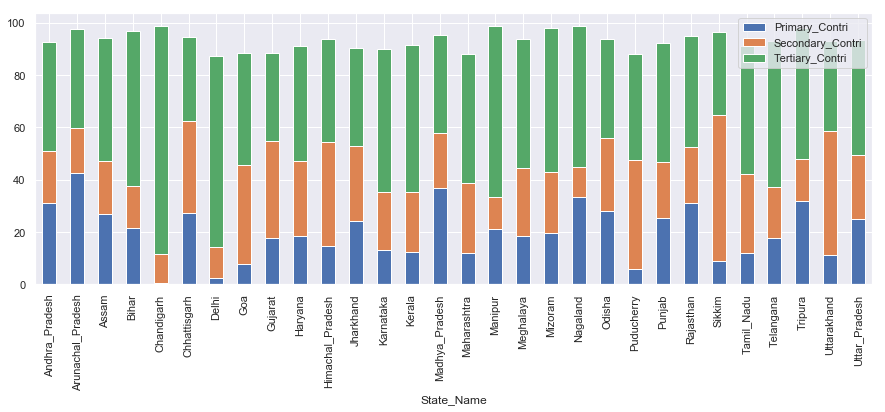

In [375]:
perc_contri.plot.bar(figsize=(15,5), stacked=True)
plt.show()

#### Q. Which plot will you use here? Why?
I have used Stacked Bar Plot. There are t categorical values here, so this plot gives nice idea of distribution of 3 sectors over the states.

#### Q. Why is (Primary + Secondary + Tertiary) not equal to total GDP?
Gross GDP is calculated as (Total GDP + Taxes - Subsidies). Since, there is no tax and subsidy in Primary + Secondary + Tertiary, this value is not equal to total GDP.

#### Q. Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.
An observation from the plot it is clear that States with low per capita GDP are getting major contribution from Tertiary sectors. Also, there is not a high correlation between state per capita GDP percentile and % contribution of primary sector. As per the analysis, states with high per capita GDP tend to have a lower contribution from Primary sector compared to states with lower per capita GDP. 


#### Calculating 0.2, 0.5,0.85 percentile of the column Per Capita GSDP (Rs.):

In [451]:
q_20 = all_states['Per Capita GSDP (Rs.)'].quantile(0.20)
q_50 = all_states['Per Capita GSDP (Rs.)'].quantile(0.50)
q_85 = all_states['Per Capita GSDP (Rs.)'].quantile(0.85)

In [457]:
print(q_20)
print(q_50)
print(q_85)

65187.0
104977.0
153246.19999999998


#### Creating C1, C2, C3 and C4 categories based on the percentile values and selecting sub sector columns:

In [623]:
C4 = all_states.loc[all_states['Per Capita GSDP (Rs.)']<q_20, ['State_Name', 'Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 'Financial services', 'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services', 'Gross State Domestic Product']]
C3 = all_states.loc[(all_states['Per Capita GSDP (Rs.)']>q_20) & (all_states['Per Capita GSDP (Rs.)']<q_50), ['State_Name', 'Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 'Financial services', 'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services', 'Gross State Domestic Product']]
C2 = all_states.loc[(all_states['Per Capita GSDP (Rs.)']>q_50) & (all_states['Per Capita GSDP (Rs.)']<q_85), ['State_Name', 'Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 'Financial services', 'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services', 'Gross State Domestic Product']]
C1 = all_states.loc[(all_states['Per Capita GSDP (Rs.)']>q_85), ['State_Name', 'Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction', 'Trade, repair, hotels and restaurants', 'Transport, storage, communication & services related to broadcasting', 'Financial services', 'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services', 'Gross State Domestic Product']]

In [602]:
C1

,State_Name,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
7,Goa,308507,3622,1177608,204110,165819,380927,189656,233618,407099,346486,180431,4063307
24,Sikkim,137447,1329,550697,212499,82058,70568,47347,21079,75330,119514,149265,1520933
9,Haryana,8.01524e+06,25186,7.75692e+06,1.10192e+06,3.70257e+06,4.98632e+06,2.56062e+06,1.67149e+06,6.97018e+06,1.03638e+06,2.00158e+06,4.37462e+07
13,Kerala,5930617,558824,4273567,482470,7314003,8557345,4020934,2010306,7287633,2068915,5728645,52600230


In [463]:
C2

,State_Name,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
28,Uttarakhand,1.60142e+06,244549,5.86625e+06,433880,1.34273e+06,1.74311e+06,1.06669e+06,385030,831307,579409,982430,1.61985e+07
15,Maharashtra,16475655,5282727,33660294,4334702,9450211,15839100,9697246,16143324,30718051,5426991,10806363,179212165
10,Himachal_Pradesh,1514981,33385,2543637,767268,808256,615496,552234,362521,1125937,553974,923164,10436879
25,Tamil_Nadu,13064238,265536,18914794,1710379,12216718,12895842,7188320,5598498,16830213,3400800,7430115,109256373
12,Karnataka,11219422,846882,12953843,1425762,6104799,8991658,5097652,4094169,24766393,2232584,5308174,92178806
8,Gujarat,1.377e+07,2.11722e+06,2.40875e+07,3.40998e+06,5.52602e+06,1.01787e+07,4.55591e+06,4.60664e+06,5.1795e+06,2.5762e+06,3.12341e+06,8.95027e+07
26,Telangana,7591501,1541853,6353711,716266,2854024,6494607,3604741,3023729,9478839,1711265,4158229,51117765
22,Punjab,9285716,10354,4790341,911611,2202962,4419919,1951809,2057520,3142786,1842730,3303041,36801089
1,Arunachal_Pradesh,686117,30842,26120,113527,147842,60421,35203,25207,48418,243867,218728,1676119


In [464]:
C3

,State_Name,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
18,Mizoram,217010,8588,8479,128365,133228,114315,52587,23168,55068,206259,186222,1155933
19,Nagaland,607897,8280,18346,37944,156072,140781,77521,60393,159651,295424,259186,1841424
5,Chhattisgarh,3948847,2451970,4370593,1198438,2669855,1535571,871770,739057,2462166,867982,1112232,23498180
23,Rajasthan,15044394,4069385,6552580,1122888,5353326,7297290,3814461,1827413,6451997,2460364,4164287,61219447
27,Tripura,799825,142391,228625,77870,177899,390423,155956,86094,190704,338244,323287,2.96666e+06
17,Meghalaya,366521,84529,433213,54473,150256,383974,148189,64091,150409,239782,214211,2.44081e+06
20,Odisha,6422978,2586328,5754229,833067,2402396,3149555,2034016,1065147,2348714,1318221,2340603,32197092


In [465]:
C4

,State_Name,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
14,Madhya_Pradesh,16235647,1618373,4368833,1272905,4403151,5357515,2865802,1988794,2660123,2497321,2747805,48198169
11,Jharkhand,3211065,2037289,4114148,337489,1789834,1991359,1470022,551441,1656784,1088325,1375410,21710718
2,Assam,3855548,1471149,2002936,296587,1733568,2987155,1194568,543651,1412466,1373611,1795658,19809800
16,Manipur,383140,NaN,49501,27490,143182,262950,109726,30315,159335,297078,317930,1.80428e+06
29,Uttar_Pradesh,25097754,901501,12261649,2030625,11256450,9437243,7404509,3392275,14548185,6152124,5034623,104337115
3,Bihar,7951890,68107,2189965,345168,3449763,7448373,3147173,1178022,3740641,2078171,4587589,37391988


#### Q. Categorize the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.
Below are the results:
### •	States in C1 Category:
Goa

Sikkim

Haryana

Kerala
### •	States in C2 Category:
Uttarakhand

Maharashtra

Himachal Pradesh

Tamil Nadu

Karnataka

Gujarat

Telangana

Punjab

Arunachal Pradesh

### •	States in C3 Category:
Mizoram

Nagaland

Chhattisgarh

Rajasthan

Tripura

Meghalaya

Odisha

### •	States in C4 Category:
Madhya_Pradesh

Jharkhand

Assam

Manipur

Uttar_Pradesh

Bihar

In [624]:
C1 = C1.T

In [625]:
C1

,7,24,9,13
State_Name,Goa,Sikkim,Haryana,Kerala
"Agriculture, forestry and fishing",308507,137447,8.01524e+06,5930617
Mining and quarrying,3622,1329,25186,558824
Manufacturing,1177608,550697,7.75692e+06,4273567
"Electricity, gas, water supply & other utility services",204110,212499,1.10192e+06,482470
Construction,165819,82058,3.70257e+06,7314003
"Trade, repair, hotels and restaurants",380927,70568,4.98632e+06,8557345
"Transport, storage, communication & services related to broadcasting",189656,47347,2.56062e+06,4020934
Financial services,233618,21079,1.67149e+06,2010306
"Real estate, ownership of dwelling & professional services",407099,75330,6.97018e+06,7287633


#### Renaming the index  'State_Name' to "Sub-sectors", taking proper columns:

In [626]:
C1 = C1.rename(index={'State_Name': 'Sub-sectors'})
new_header = C1.iloc[0]
C1.columns = new_header
C1 = C1.iloc[1:,:]

In [627]:
C1

Sub-sectors,Goa,Sikkim,Haryana,Kerala
"Agriculture, forestry and fishing",308507,137447,8.01524e+06,5930617
Mining and quarrying,3622,1329,25186,558824
Manufacturing,1177608,550697,7.75692e+06,4273567
"Electricity, gas, water supply & other utility services",204110,212499,1.10192e+06,482470
Construction,165819,82058,3.70257e+06,7314003
"Trade, repair, hotels and restaurants",380927,70568,4.98632e+06,8557345
"Transport, storage, communication & services related to broadcasting",189656,47347,2.56062e+06,4020934
Financial services,233618,21079,1.67149e+06,2010306
"Real estate, ownership of dwelling & professional services",407099,75330,6.97018e+06,7287633
Public administration,346486,119514,1.03638e+06,2068915


#### Creating new column "Sum", which is the sum of each sub-sectors state wise:

In [628]:
C1['Sum'] = C1.sum(axis=1)

In [629]:
C1

Sub-sectors,Goa,Sikkim,Haryana,Kerala,Sum
"Agriculture, forestry and fishing",308507,137447,8.01524e+06,5930617,14391809.0
Mining and quarrying,3622,1329,25186,558824,588961.0
Manufacturing,1177608,550697,7.75692e+06,4273567,13758793.0
"Electricity, gas, water supply & other utility services",204110,212499,1.10192e+06,482470,2000998.0
Construction,165819,82058,3.70257e+06,7314003,11264451.0
"Trade, repair, hotels and restaurants",380927,70568,4.98632e+06,8557345,13995159.0
"Transport, storage, communication & services related to broadcasting",189656,47347,2.56062e+06,4020934,6818560.0
Financial services,233618,21079,1.67149e+06,2010306,3936489.0
"Real estate, ownership of dwelling & professional services",407099,75330,6.97018e+06,7287633,14740245.0
Public administration,346486,119514,1.03638e+06,2068915,3571292.0


#### Getting value of the total GSDP for category C1:

In [630]:
Total_GSDP_C1 = C1.loc['Gross State Domestic Product', 'Sum']

In [631]:
Total_GSDP_C1

101930677.0

#### Removing the index "Gross State Domestic Product" as it is not required:

In [632]:
C1 = C1.drop(index='Gross State Domestic Product')

In [633]:
C1

Sub-sectors,Goa,Sikkim,Haryana,Kerala,Sum
"Agriculture, forestry and fishing",308507,137447,8.01524e+06,5930617,14391809.0
Mining and quarrying,3622,1329,25186,558824,588961.0
Manufacturing,1177608,550697,7.75692e+06,4273567,13758793.0
"Electricity, gas, water supply & other utility services",204110,212499,1.10192e+06,482470,2000998.0
Construction,165819,82058,3.70257e+06,7314003,11264451.0
"Trade, repair, hotels and restaurants",380927,70568,4.98632e+06,8557345,13995159.0
"Transport, storage, communication & services related to broadcasting",189656,47347,2.56062e+06,4020934,6818560.0
Financial services,233618,21079,1.67149e+06,2010306,3936489.0
"Real estate, ownership of dwelling & professional services",407099,75330,6.97018e+06,7287633,14740245.0
Public administration,346486,119514,1.03638e+06,2068915,3571292.0


#### Creating new column "%_Sub_Sec_Contri", which is percentage contribution of each sub-sectors over GSDP:

In [634]:
C1['%_Sub_Sec_Contri'] = round(100 * (C1['Sum']/Total_GSDP_C1), 2)

#### Sorting the column %_ Sub_Sec_Contri:

In [635]:
C1 = C1.sort_values(by='%_Sub_Sec_Contri', ascending=False)

In [790]:
C1[['%_Sub_Sec_Contri']].head()

Sub-sectors,%_Sub_Sec_Contri
"Real estate, ownership of dwelling & professional services",14.46
"Agriculture, forestry and fishing",14.12
"Trade, repair, hotels and restaurants",13.73
Manufacturing,13.50
Construction,11.05


#### Plotting contribution of the sub-sectors as a percentage of the GSDP for C1:

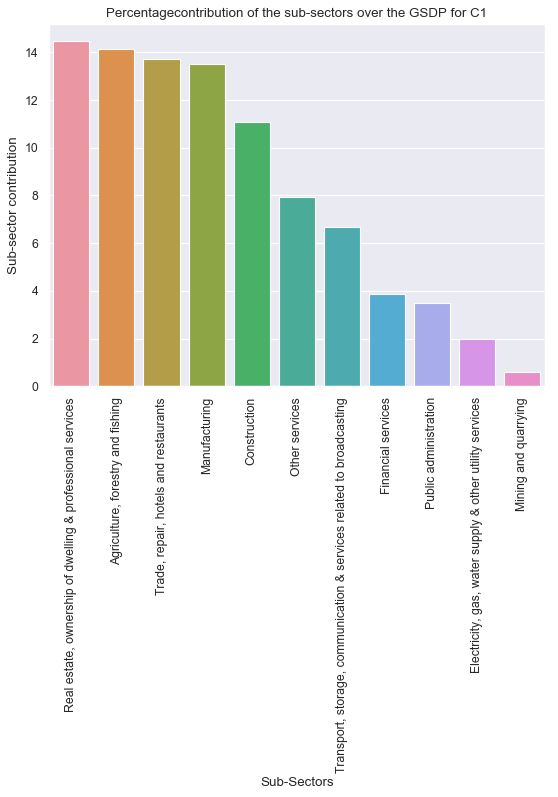

In [879]:
plt.figure(figsize=(8,6), dpi=80)
sns.barplot(x=C1.index, y='%_Sub_Sec_Contri', data=C1)
plt.xlabel("Sub-Sectors")
plt.ylabel("Sub-sector contribution")
plt.title("Percentagecontribution of the sub-sectors over the GSDP for C1")
plt.xticks(rotation=90)
plt.show()

### Repeating the same thing for other categories C2, C3 and C4:

### For C2:

In [675]:
C2 = C2.T
C2 = C2.rename(index={'State_Name': 'Sub-sectors'})
new_header = C2.iloc[0]
C2.columns = new_header
C2 = C2.iloc[1:,:]

In [676]:
C2['Sum'] = C2.sum(axis=1)

In [677]:
Total_GSDP_C2 = C2.loc['Gross State Domestic Product', 'Sum']

In [657]:
Total_GSDP_C2

586380452.0

In [678]:
C2 = C2.drop(index='Gross State Domestic Product')

In [679]:
C2['%_Sub_Sec_Contri'] = round(100 * (C2['Sum']/Total_GSDP_C2), 2)

In [680]:
C2 = C2.sort_values(by='%_Sub_Sec_Contri', ascending=False)

In [791]:
C2[['%_Sub_Sec_Contri']].head()

Sub-sectors,%_Sub_Sec_Contri
Manufacturing,18.62
"Real estate, ownership of dwelling & professional services",15.71
"Agriculture, forestry and fishing",12.83
"Trade, repair, hotels and restaurants",10.44
Construction,6.93


#### Plotting contribution of the sub-sectors as a percentage of the GSDP for C2:

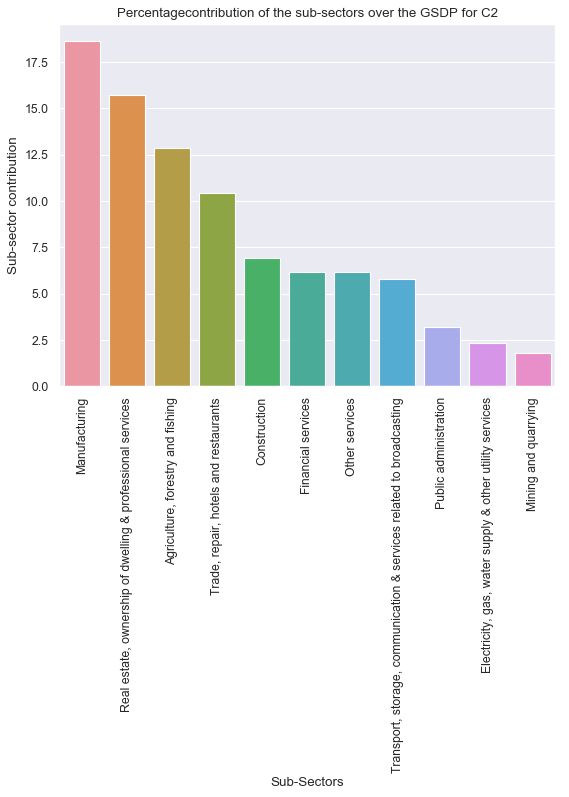

In [880]:
plt.figure(figsize=(8,6), dpi=80)
sns.barplot(x=C2.index, y='%_Sub_Sec_Contri', data=C2)
plt.xlabel("Sub-Sectors")
plt.ylabel("Sub-sector contribution")
plt.title("Percentagecontribution of the sub-sectors over the GSDP for C2")
plt.xticks(rotation=90)
plt.show()

### For C3:

In [670]:
C3 = C3.T
C3 = C3.rename(index={'State_Name': 'Sub-sectors'})
new_header = C3.iloc[0]
C3.columns = new_header
C3 = C3.iloc[1:,:]

In [682]:
C3['Sum'] = C3.sum(axis=1)

In [684]:
Total_GSDP_C3 = C3.loc['Gross State Domestic Product', 'Sum']

In [685]:
Total_GSDP_C3

125319545.0

In [687]:
C3 = C3.drop(index='Gross State Domestic Product')

In [689]:
C3['%_Sub_Sec_Contri'] = round(100 * (C3['Sum']/Total_GSDP_C3), 2)

In [691]:
C3 = C3.sort_values(by='%_Sub_Sec_Contri', ascending=False)

In [792]:
C3[['%_Sub_Sec_Contri']].head()

Sub-sectors,%_Sub_Sec_Contri
"Agriculture, forestry and fishing",21.87
Manufacturing,13.86
"Trade, repair, hotels and restaurants",10.38
"Real estate, ownership of dwelling & professional services",9.43
Construction,8.81


#### Plotting contribution of the sub-sectors as a percentage of the GSDP for C3:

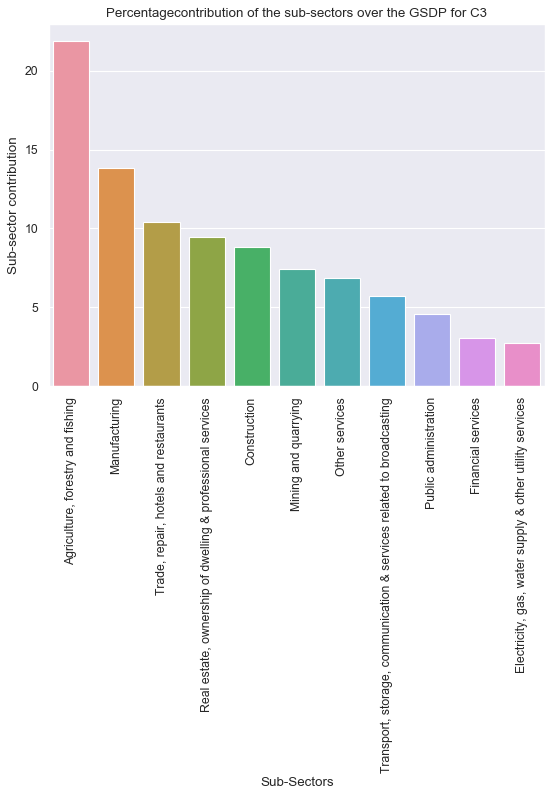

<Figure size 432x288 with 0 Axes>

In [881]:
plt.figure(figsize=(8,6), dpi=80)
sns.barplot(x=C3.index, y='%_Sub_Sec_Contri', data=C3)
plt.xlabel("Sub-Sectors")
plt.ylabel("Sub-sector contribution")
plt.title("Percentagecontribution of the sub-sectors over the GSDP for C3")
plt.xticks(rotation=90)
plt.show()
plt.savefig('Try.png')

### For C4:

In [782]:
C4 = C4.T
C4 = C4.rename(index={'State_Name': 'Sub-sectors'})
new_header = C4.iloc[0]
C4.columns = new_header
C4 = C4.iloc[1:,:]

In [783]:
C4['Sum'] = C4.sum(axis=1)

In [784]:
Total_GSDP_C4 = C4.loc['Gross State Domestic Product', 'Sum']

In [785]:
Total_GSDP_C4

233252066.0

In [786]:
C4 = C4.drop(index='Gross State Domestic Product')

In [787]:
C4['%_Sub_Sec_Contri'] = round(100 * (C4['Sum']/Total_GSDP_C4), 2)

In [788]:
C4 = C4.sort_values(by='%_Sub_Sec_Contri', ascending=False)

In [793]:
C4[['%_Sub_Sec_Contri']].head()

Sub-sectors,%_Sub_Sec_Contri
"Agriculture, forestry and fishing",24.32
"Trade, repair, hotels and restaurants",11.78
Manufacturing,10.71
"Real estate, ownership of dwelling & professional services",10.37
Construction,9.76


#### Plotting contribution of the sub-sectors as a percentage of the GSDP for C4:

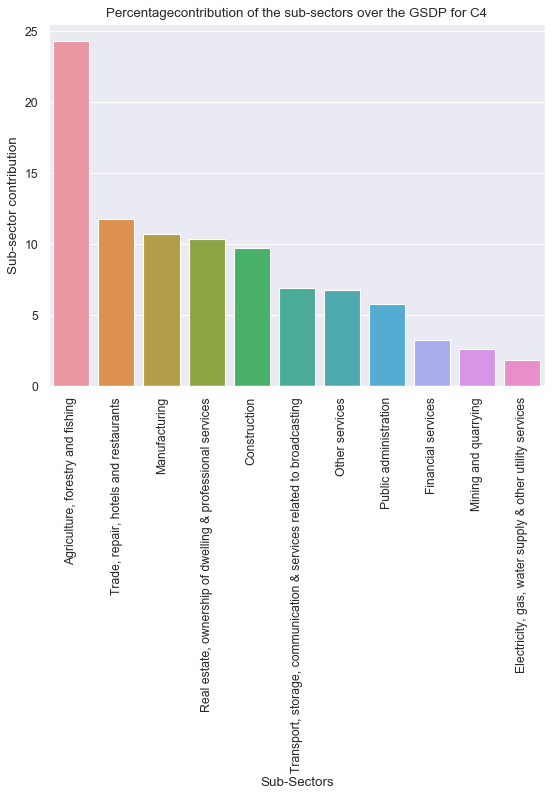

In [882]:
plt.figure(figsize=(8,6), dpi=80)
sns.barplot(x=C4.index, y='%_Sub_Sec_Contri', data=C4)
plt.xlabel("Sub-Sectors")
plt.ylabel("Sub-sector contribution")
plt.title("Percentagecontribution of the sub-sectors over the GSDP for C4")
plt.xticks(rotation=90)
plt.show()

### •	Find the top 3/4/5 sub-sectors:

### •	Top 3 sub-sectors for C1:
1.	Real estate, ownership of dwelling & professional services
2.	Agriculture, forestry and fishing
3.	Trade, repair, hotels and restaurants

### •	Top 3 sub-sectors for C2:
1.	Manufacturing
2.	Real estate, ownership of dwelling & professional services
3.	Agriculture, forestry and fishing


### •	Top 3 sub-sectors for C3:
1.	Agriculture, forestry and fishing
2.	Manufacturing
3.	Trade, repair, hotels and restaurants

### •	Top 3 sub-sectors for C4:
1.	Agriculture, forestry and fishing
2.	Trade, repair, hotels and restaurants
3.	Manufacturing


#### Q. How does the GDP distribution of the top states (C1) differ from the others?
States in the C1 category are majorly getting contribution from Secondary and Tertiary Sectors. As compared to states in other categories, C1 states are less in population, hence, high with per capita GDP. In C1 states main contribution is happening from “Real-estate” sub-sector, which is not on the top of other categories subsectors.

#### Q. Which sub-sectors seem to be correlated with high GDP?
After comparing graphs, Agriculture, Manufacturing and Trade are highly correlated with GDP.

#### Q. Which sub-sectors do the various categories need to focus on?
Mining, Electricity and Gas etc.


# <cemter>--------------------------------------------------------------------------------------------------------</center>

# <center>Part-II:</center>

#### Loading the dropout rate dataset:

In [815]:
drop_df = pd.read_csv("D:/Agam's World/Office Documents/Data Science/UpGrad/GDP Assignment/rs_session243_au570_1.1.csv")

In [816]:
drop_df.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


#### Selecting only required columns 'Level of Education - State', 'Primary - 2014-2015', 'Upper Primary - 2014-2015', and 'Secondary - 2014-2015':

In [817]:
drop_df = drop_df.loc[:, ['Level of Education - State', 'Primary - 2014-2015', 'Upper Primary - 2014-2015', 'Secondary - 2014-2015']]

#### Renaming the column "Level of Education - State" as "State_Name" to get the common column name for merging the data with the dataframe used in first part:

In [818]:
drop_df = drop_df.rename(columns={'Level of Education - State': 'State_Name'})

In [819]:
drop_df.head()

,State_Name,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,1.21,1.69,9.87
1,Andhra Pradesh,4.35,5.20,15.71
2,Arunachal Pradesh,10.89,6.71,17.11
3,Assam,7.44,10.51,27.06
4,Bihar,2.09,4.08,25.90


#### Getting the dataframe from the part - I and selecting columns 'State_Name', 'Primary', 'Secondary', 'Tertiary', 'Gross State Domestic Product'

In [820]:
perc_contri = states.loc[:, ['State_Name', 'Primary', 'Secondary', 'Tertiary', 'Gross State Domestic Product']]

In [821]:
perc_contri.head()

,State_Name,Primary,Secondary,Tertiary,Gross State Domestic Product
0,Andhra_Pradesh,16303716,10488884,22032942,52646842
1,Arunachal_Pradesh,716959,287489,631844,1676119
2,Assam,5326697,4033091,9307109,19809800
3,Bihar,8019997,5984896,22179969,37391988
4,Chandigarh,16412,312693,2426008,2784426


#### Creating new columns "Primary_contri", "Secondary_Contri" and "Tertiary_Contri", which are percentage contribution of Primary, Seconadry and Tertiary sectors respectively. These values are calculated after dividing with Total GDP of the states. Rounding the result to 2 decimal values:

In [822]:
perc_contri['Primary_Contri'] = 100 * (perc_contri['Primary']/perc_contri['Gross State Domestic Product'])
perc_contri['Secondary_Contri'] = 100 * (perc_contri['Secondary']/perc_contri['Gross State Domestic Product'])
perc_contri['Tertiary_Contri'] = 100 * (perc_contri['Tertiary']/perc_contri['Gross State Domestic Product'])

#### Selecting only columns 'State_Name', 'Primary_Contri', 'Secondary_Contri', 'Tertiary_Contri' :

In [823]:
perc_contri = perc_contri.loc[:, ['State_Name', 'Primary_Contri', 'Secondary_Contri', 'Tertiary_Contri']]

In [824]:
perc_contri.head()

,State_Name,Primary_Contri,Secondary_Contri,Tertiary_Contri
0,Andhra_Pradesh,30.9681,19.9231,41.8505
1,Arunachal_Pradesh,42.7749,17.1521,37.6968
2,Assam,26.8892,20.3591,46.9823
3,Bihar,21.4484,16.0058,59.3174
4,Chandigarh,0.589421,11.2301,87.1278


#### Merging the dataframes drop_df and perc_contri:

In [825]:
merged_drop = drop_df.merge(perc_contri, on='State_Name', how='inner')

In [827]:
merged_drop.head()

,State_Name,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Primary_Contri,Secondary_Contri,Tertiary_Contri
0,Assam,7.44,10.51,27.06,26.8892,20.3591,46.9823
1,Bihar,2.09,4.08,25.90,21.4484,16.0058,59.3174
2,Chandigarh,NaN,0.44,NaN,0.589421,11.2301,87.1278
3,Delhi,NaN,0.76,11.81,2.46605,11.7162,73.188
4,Goa,0.20,0.07,11.15,7.68165,38.0856,42.7784


In [746]:
merged_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 7 columns):
State_Name                   22 non-null object
Primary - 2014-2015          19 non-null float64
Upper Primary - 2014-2015    21 non-null float64
Secondary - 2014-2015        21 non-null float64
Primary_Contri               22 non-null object
Secondary_Contri             22 non-null object
Tertiary_Contri              22 non-null object
dtypes: float64(3), object(4)
memory usage: 1.4+ KB


#### As the data type of colums 'Primary_Contri', 'Secondary_Contri', 'Tertiary_Contri' is "object". Coverting these into "float":

In [828]:
merged_drop[['Primary_Contri', 'Secondary_Contri', 'Tertiary_Contri']] = merged_drop[['Primary_Contri', 'Secondary_Contri', 'Tertiary_Contri']].astype('float')

In [829]:
merged_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 7 columns):
State_Name                   22 non-null object
Primary - 2014-2015          19 non-null float64
Upper Primary - 2014-2015    21 non-null float64
Secondary - 2014-2015        21 non-null float64
Primary_Contri               22 non-null float64
Secondary_Contri             22 non-null float64
Tertiary_Contri              22 non-null float64
dtypes: float64(6), object(1)
memory usage: 1.4+ KB


#### Creating correlation:

In [830]:
drop_corr = merged_drop.corr()

In [831]:
drop_corr

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Primary_Contri,Secondary_Contri,Tertiary_Contri
Primary - 2014-2015,1.000000,0.422889,0.012507,0.457796,-0.499507,0.498439
Upper Primary - 2014-2015,0.422889,1.000000,0.517302,0.604593,-0.140305,-0.273167
Secondary - 2014-2015,0.012507,0.517302,1.000000,0.467621,-0.110507,-0.164589
Primary_Contri,0.457796,0.604593,0.467621,1.000000,-0.279196,-0.359572
Secondary_Contri,-0.499507,-0.140305,-0.110507,-0.279196,1.000000,-0.759322
Tertiary_Contri,0.498439,-0.273167,-0.164589,-0.359572,-0.759322,1.000000


### Plotting Correlation between dropout rate and % contribution of each sector (Primary, Secondary and Tertiary) over GDP:

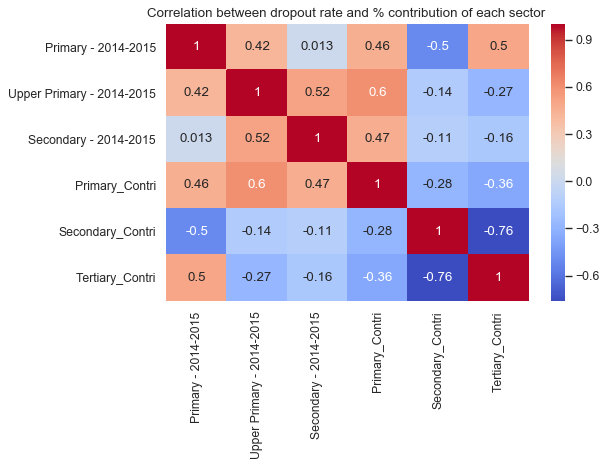

In [885]:
plt.figure(figsize=(8,6), dpi=80)
sns.heatmap(drop_corr, annot=True, cmap='coolwarm')
plt.title("Correlation between dropout rate and % contribution of each sector ")
plt.tight_layout()
plt.show()

#### Getting the column "Population ('00)" from the all_state dataframe:

In [845]:
population = all_states[["Population ('00)"]]

In [847]:
population.head()

,Population ('00)
7,14950
24,6330
9,266620
13,339843
28,105820


#### Creating new column "Population" in the merged_drop dataframe:

In [848]:
merged_drop['Population'] = population

#### converting the data type of 'Population' column into "float":

In [850]:
merged_drop['Population'] = merged_drop['Population'].astype('float')

In [852]:
merged_drop.head()

,State_Name,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Primary_Contri,Secondary_Contri,Tertiary_Contri,Population
0,Assam,7.44,10.51,27.06,26.889201,20.359070,46.982347,501510.0
1,Bihar,2.09,4.08,25.90,21.448437,16.005825,59.317437,14870.0
2,Chandigarh,NaN,0.44,NaN,0.589421,11.230070,87.127760,326780.0
3,Delhi,NaN,0.76,11.81,2.466055,11.716219,73.188021,1101240.0
4,Goa,0.20,0.07,11.15,7.681649,38.085628,42.778382,NaN


#### Creating Correlation matrix agains Population:

In [853]:
pop_corr = merged_drop.corr()

In [854]:
pop_corr

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Primary_Contri,Secondary_Contri,Tertiary_Contri,Population
Primary - 2014-2015,1.000000,0.422889,0.012507,0.457796,-0.499507,0.498439,0.306271
Upper Primary - 2014-2015,0.422889,1.000000,0.517302,0.604593,-0.140305,-0.273167,0.095172
Secondary - 2014-2015,0.012507,0.517302,1.000000,0.467621,-0.110507,-0.164589,0.309508
Primary_Contri,0.457796,0.604593,0.467621,1.000000,-0.279196,-0.359572,0.037923
Secondary_Contri,-0.499507,-0.140305,-0.110507,-0.279196,1.000000,-0.759322,-0.365807
Tertiary_Contri,0.498439,-0.273167,-0.164589,-0.359572,-0.759322,1.000000,0.268424
Population,0.306271,0.095172,0.309508,0.037923,-0.365807,0.268424,1.000000


#### Q. Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?
As per the plot, we can infer below:

1.	Dropout rate for primary education is positively correlated with Primary and Tertiary contributions, however, it is negatively correlated with Secondary Contribution.
2.	Dropout rate for upper primary education is positively correlated with only Primary Contribution, however, it is negatively correlated with Secondary and Tertiary Contributions.
3.	Dropout rate for secondary education is also positively correlated with only Primary Contribution, however, it is negatively correlated with Secondary and Tertiary Contributions.


### Plotting Correlation of Primary, Upper Primary and Secondary education against population:

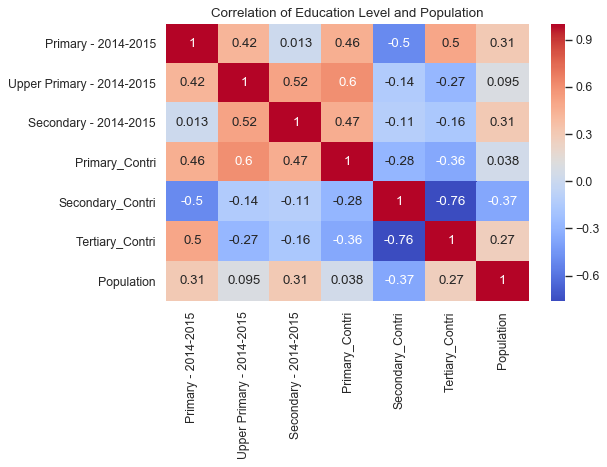

In [855]:
plt.figure(figsize=(8,6), dpi=80)
sns.heatmap(pop_corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Education Level and Population")
plt.tight_layout()
plt.show()

#### Q. You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?
As per the plot, we can infer below:
Dropout rate for all the educations (Primary. Upper Primary and Secondary) is positively correlated with population, where Primary and Secondary levels have same correlation; however, Upper Secondary has vey less.
